# Pythonによる因果分析
参考書籍：https://amzn.to/2W3WRCM

## 4-1. 回帰分析による因果推論の実装

In [30]:
import IPython
import random
import numpy as np
import pandas as pd
from scipy.special import expit

In [3]:
num_data = 200

In [4]:
# Age
x_1 = np.random.randint(15, 76, num_data)
# Sex 0: woman 1: man
x_2 = np.random.randint(0, 2, num_data)
# noise
e_z = np.random.randn(num_data)

z_base = x_1 + (1-x_2)*10 - 40 + 5*e_z

In [5]:
z_prob = expit(0.1*z_base)

In [6]:
Z = np.array([])

In [7]:
for i in range(num_data):
    Z_i = np.random.choice(2, size=1, p=[1-z_prob[i], z_prob[i]])[0]
    Z = np.append(Z, Z_i)

In [12]:
e_y = np.random.randn(num_data)
Y = -x_1 + 30*x_2 + 10*Z + 80 + 10*e_y

# ここでは介入効果は+10が正解となるように仮定している

In [14]:
df = pd.DataFrame({'age': x_1, 'sex': x_2, 'saw_cm': Z, 'purchase_amount': Y})

In [16]:
df.head()

age  sex  saw_cm  purchase_amount
0   17    1     0.0       101.862605
1   41    1     0.0        79.656635
2   20    1     0.0        98.964058
3   30    1     0.0        84.694172
4   58    0     1.0        41.948593

In [19]:
df.groupby(['saw_cm']).mean()
# CMをみている人は年齢が高く女性が多い
# 購入量は男性の方が多い
# これで擬似データが完成

age       sex  purchase_amount
saw_cm                                   
0.0     30.400  0.613333        69.259193
1.0     52.392  0.464000        51.574827

In [20]:
from sklearn.linear_model import LinearRegression

In [22]:
X = df[['age', 'sex', 'saw_cm']]
y = df['purchase_amount']

In [23]:
reg = LinearRegression().fit(X, y)

In [27]:
print('CMをみたという介入効果は', reg.coef_[2])
# CMをみたら購入量はおよそ９増える

CMをみたという介入効果は 9.172783688208007


## 4-2. 傾向スコアを用いた逆確率重み付け法の実装

調整化公式の式変換について
$$
P(X,Y,Z) = P(Y \mid X, Z)P(X, Z) \\
P(Y \mid X, Z) = \frac{P(X,Y,Z)}{P(X, Z)} \\
また分母のP(X, Z)は\\
P(X,Z) = P(Z \mid X)P(X) \\
であるため代入すると\\
P(Y \mid X, Z) = \frac{P(X,Y,Z)}{P(Z \mid X)P(X)} \\
つまり調整化公式の右辺はP(X)が分母と分子に存在するため消える\\
P(Y \mid X, Z)P(X)=\frac{P(X,Y,Z)}{P(Z \mid X)} \\
最終的に以下の式になる \\
P(Y=y\mid do(Z=z)) = \sum_{x}{\frac{P(X,Y,Z)}{P(Z \mid X)}}
$$

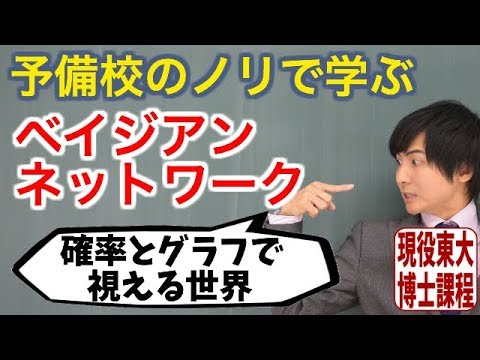

In [32]:
# 参考Youtube
IPython.display.YouTubeVideo('zYKOL5RpVbo', start=189)